### Exploratory Analysis - Mass Mobilization Protests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os, sys
import math

from sklearn.preprocessing import OneHotEncoder

from sqlalchemy import create_engine


pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

path_data = os.path.join('..', 'data', 'raw')

UNKNOWN = 'unknown'

In [2]:
path_csv = os.path.join(path_data, 'Mass-Mobilization-Protests', 'mmALL_073120_csv.csv')
df = pd.read_csv(path_csv)

In [3]:
df.loc[23]

id                                                               202000004
country                                                             Canada
ccode                                                                   20
year                                                                  2000
region                                                       North America
protest                                                                  1
protestnumber                                                            4
startday                                                              16.0
startmonth                                                             6.0
startyear                                                           2000.0
endday                                                                16.0
endmonth                                                               6.0
endyear                                                             2000.0
protesterviolence        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [5]:
def print_counts(series):
    unique = series.value_counts()
    return unique

In [6]:
print_counts(df.id)

512000000     1
4502005006    1
2202017017    1
2001995002    1
1352011003    1
             ..
2202002009    1
2001998017    1
4901991003    1
6402014010    1
701995005     1
Name: id, Length: 17145, dtype: int64

### Country names codes

Make consistent with other data sources to enable merging. Minor differences in spelling, abbreviations, casing, etc. make this necessary. Process completed in simple Excel file for simplicity. Import that lookup table to convert to new naming schemes.

In [7]:
df_naming_lookup = pd.read_excel('../src/country_codes_protests.xlsx')
renaming_dict = dict(zip(df_naming_lookup.ccode.values, df_naming_lookup.country_final))
scode_dict = dict(zip(df_naming_lookup.ccode.values, df_naming_lookup.scode_final))

df['scode_final'] = df.ccode.map(scode_dict)
df['countryname_final'] = df.ccode.map(renaming_dict)
display(df[['ccode', 'country', 'countryname_final', 'scode_final']].drop_duplicates())
df.drop(['ccode', 'country'], axis=1, inplace=True)

,ccode,country,countryname_final,scode_final
0,20,Canada,Canada,CAN
60,40,Cuba,Cuba,CUB
182,41,Haiti,Haiti,HAI
306,42,Dominican Republic,Dominican Republic,DOM
389,51,Jamaica,Jamaica,JAM
434,70,Mexico,Mexico,MEX
587,90,Guatemala,Guatemala,GUA
704,91,Honduras,Honduras,HON
820,92,El Salvador,El Salvador,SAL
886,93,Nicaragua,Nicaragua,NIC


In [8]:
# year = df.year.unique()
# year.sort()
# print(year)

# print_counts(df.year)

In [9]:
# print_counts(df.region)

In [10]:
# print_counts(df.protest)

In [11]:
# print_counts(df.protestnumber)

In [12]:
# print(df.loc[df.protestnumber == 0].protesterdemand1.value_counts())
# print(df.loc[df.protestnumber == 0].stateresponse1.value_counts())
# print(df.loc[df.protestnumber == 0].notes.value_counts())

In [13]:
df = df.loc[df.protest == 1].copy()
df.reset_index(inplace=True, drop=True)

##### Notes: drop all rows with df.protest == 0. This means no protest took place, which can be verified by investigating a sample of those entries. Since this analysis studies only protests, non-protest entries are not of interest.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15239 non-null  int64  
 1   year                   15239 non-null  int64  
 2   region                 15239 non-null  object 
 3   protest                15239 non-null  int64  
 4   protestnumber          15239 non-null  int64  
 5   startday               15239 non-null  float64
 6   startmonth             15239 non-null  float64
 7   startyear              15239 non-null  float64
 8   endday                 15239 non-null  float64
 9   endmonth               15239 non-null  float64
 10  endyear                15239 non-null  float64
 11  protesterviolence      15239 non-null  float64
 12  location               15218 non-null  object 
 13  participants_category  9887 non-null   object 
 14  participants           15227 non-null  object 
 15  pr

# Convert 'Start' and 'End' data to their own datetime columns

In [15]:
# For start date
start_date = df[['startyear', 'startmonth', 'startday']]
start_date.columns = ['year', 'month', 'day']
df['start_datetime'] = pd.to_datetime(start_date)

# For end date
end_date = df[['endyear', 'endmonth', 'endday']]
end_date.columns = ['year', 'month', 'day']
df['end_datetime'] = pd.to_datetime(end_date)


# Duration
df['duration_days'] = (df.end_datetime - df.start_datetime).dt.days


# Display resulting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     15239 non-null  int64         
 1   year                   15239 non-null  int64         
 2   region                 15239 non-null  object        
 3   protest                15239 non-null  int64         
 4   protestnumber          15239 non-null  int64         
 5   startday               15239 non-null  float64       
 6   startmonth             15239 non-null  float64       
 7   startyear              15239 non-null  float64       
 8   endday                 15239 non-null  float64       
 9   endmonth               15239 non-null  float64       
 10  endyear                15239 non-null  float64       
 11  protesterviolence      15239 non-null  float64       
 12  location               15218 non-null  object        
 13  p

### Is "year" column the same as "startyear" column?

In [16]:
df.loc[df.year != df.startyear]

,id,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,scode_final,countryname_final,start_datetime,end_datetime,duration_days


##### Yes, it is. Exclude it from final clean dataframe

# Create column for Duration

In [17]:
# print_counts(df.startday)

In [18]:
# print_counts(df.startmonth)

In [19]:
# print_counts(df.startyear)

In [20]:
# print_counts(df.endday)

In [21]:
# print_counts(df.endmonth)

In [22]:
# print_counts(df.endyear)

In [23]:
# print_counts(df.protesterviolence)

In [24]:
# df.location.value_counts().shape

##### 'Locations' column isn't at all standardized. Avoid using unless absolutely necessary. The 'Country' column should provide the necessary information for an MVP.

Fill na's with UNKNOWN

In [25]:
df['location'] = df.location.fillna(UNKNOWN)

In [26]:
# df.info()

In [27]:
# df.participants.isna()

In [28]:
# #print(df.participants_category.value_counts())
# df.loc[df.participants.isna()]

### Fill in missing "Participants Category" value using the "Participants" column. 
This takes some manual  changes. Everything that can be changed from string to int is done automatically. Everything that can't be done automatically is added to a dictionary to be done manually. This *drastically* reduces any need for manual work

In [29]:
# Convert range in format "a-b" to average(a, b)
def convert_range_to_average(range_string):

    if range_string is np.nan:
        return np.nan
    
    # Split "x-y" format
    range_list = str.split(range_string, '-')
    
    if len(range_list)==1:
        avg = range_list[0].replace('<', '').replace('>', '')
    
    elif len(range_list)==2:
        # Convert both "x" and "y" to ints before averaging
        avg = np.mean([int(range_list[0]), int(range_list[1])])
    
    else:
        raise error

    # Return average
    return int(avg)

In [30]:
# ----- CREATE 'CONVERTER' DICTIONARY -----
# also create dictionary of 'participant' values that couldn't be converted

# Gather array of unique 'participants' values
participants_unique = df.participants.dropna().unique()

# Create empty dictionaries to hold lookups
converter = {}

# Create dictionary to convert messy strings to ints
#print("COULDN'T CONVERT THE FOLLOWING VALUES:\n")
for participant in participants_unique:

    # Else remove commonly unnecessary characters
    participant_clean = str.lower(participant)\
                           .replace(',', '')\
                           .replace('about', '')\
                           .replace('around', '')\
                           .replace('over', '')\
                           .replace('people', '')\
                           .replace('some', '')\
                           .replace('estimated', '')\
                           .replace('protester', '')\
                           .replace('construction worker', '')\
                           .replace('member', '')\
                           .replace('citizen', '')\
                           .replace('parent', '')\
                           .replace('local', '')\
                           .replace('demonstrator', '')\
                           .replace('teacher', '')\
                           .replace('activist', '')\
                           .replace('supporter', '')\
                           .replace('villager', '')\
                           .replace('campaign', '')\
                           .replace('campaigner', '')\
                           .replace('driver', '')\
                           .replace('resident', '')\
                           .replace('participant', '')\
                           .replace(' of ', '')\
                           .replace('_', '')\
                           .replace(' to ', '-')\
                           .replace('>', '')\
                           .replace('<', '')\
                           .replace('+', '')\
                           .replace('almost','')\
                           .replace('more than','')\
                           .replace('less than', '')\
                           .replace('nearly', '')\
                           .replace('up to', '')\
                           .replace('at least', '')\
                           .replace('s', '')
    # Try converting clean value
    try:

        # Append to converter dictionary if successful
        converter[participant] = int(participant_clean)

    # Else convert values of format "x-y"
    except:
        try:

            converter[participant] = convert_range_to_average(participant_clean)

        # Else create dict to manually clean
        except:
            #print("Couldn't convert: {}  /  {}".format(participant, participant_clean))
            pass



In [31]:
# Identify the rows that weren't able to be converted using the dict above. 
# Estimate whether or not it is practical top use "participants_category"
# to average values within a range and use that value within participants_clean

temp = df[['id', 'participants', 'participants_category']].copy()
temp['participants_clean'] = df['participants'].map(converter)#.astype('Int64')

nas = temp.loc[temp['participants_clean'].isna()]
print('Remaining rows:', nas.shape[0])
print('Examples include:')


nas.sort_values(by='participants').head(100)

Remaining rows: 1291
Examples include:


,id,participants,participants_category,participants_clean
1410,1012017014,"""Rocked by protests""",100-999,NaN
11615,6601992002,.,NaN,NaN
1633,1302005002,.,NaN,NaN
11631,6602002005,.,NaN,NaN
15100,8501999009,.,NaN,NaN
12975,7321990014,.,NaN,NaN
15087,8501998019,.,NaN,NaN
6651,3641990010,1 million,>10000,NaN
11442,6452017003,100 wounded,2000-4999,NaN
11588,6512017001,12 arrested,50-99,NaN


In [32]:
# Apply dictionary to convert original participant counts
counts_converted = df['participants'].map(converter)#.astype('Int64')

# Create a series to hold the averages converted from the range column
range_as_average = df['participants_category'].apply(convert_range_to_average)

# Choose the count value unless it is NaN, in which case use avg value
chose_non_nan = lambda avg, count: avg if math.isnan(float(count)) else count

df['participants_clean'] = list(map(chose_non_nan, range_as_average, counts_converted))
print('Total remaining NaN values:', df['participants_clean'].isna().sum())

Total remaining NaN values: 14


In [33]:
counts_converted

0        1000.0
1        1000.0
2         500.0
3         100.0
4         950.0
          ...  
15234     100.0
15235    1000.0
15236      50.0
15237      50.0
15238     100.0
Name: participants, Length: 15239, dtype: float64

In [34]:
df.loc[23]

id                                                               202005001
year                                                                  2005
region                                                       North America
protest                                                                  1
protestnumber                                                            1
startday                                                               3.0
startmonth                                                             3.0
startyear                                                           2005.0
endday                                                                 3.0
endmonth                                                               4.0
endyear                                                             2005.0
protesterviolence                                                      1.0
location                                                            Quebec
participants_category    

#### YAY the above worked to fill in missing Participant values from Participant Categories values

In [35]:
# Provide conversion from string formats to list formats
dict_str_to_list = {
    '50-99': [50, 99],
    '100-999': [100, 999],
    '2000-4999': [2000, 4999],
    '1000-1999': [1000, 1999],
    '5000-9999': [5000, 9999],
    '10000+': [10000, int(10e12)]}

dict_str_to_list

{'50-99': [50, 99],
 '100-999': [100, 999],
 '2000-4999': [2000, 4999],
 '1000-1999': [1000, 1999],
 '5000-9999': [5000, 9999],
 '10000+': [10000, 10000000000000]}

In [36]:
def pick_bucket(x):
    for key in dict_str_to_list:
        lim_low = dict_str_to_list[key][0]
        lim_hi  = dict_str_to_list[key][1]
        
        if (x >= lim_low) and (x <= lim_hi):
            return key
    return np.nan

df['participants_category_manufactured'] = list(map(pick_bucket, df['participants_clean']))

df['participants_category_manufactured']

0        1000-1999
1        1000-1999
2          100-999
3          100-999
4          100-999
           ...    
15234      100-999
15235    1000-1999
15236        50-99
15237        50-99
15238      100-999
Name: participants_category_manufactured, Length: 15239, dtype: object

#### Now, check if the above categories match the Categories column in df as a QC

In [37]:
df.loc[23]

id                                                                            202005001
year                                                                               2005
region                                                                    North America
protest                                                                               1
protestnumber                                                                         1
startday                                                                            3.0
startmonth                                                                          3.0
startyear                                                                        2005.0
endday                                                                              3.0
endmonth                                                                            4.0
endyear                                                                          2005.0
protesterviolence               

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  15239 non-null  int64         
 1   year                                15239 non-null  int64         
 2   region                              15239 non-null  object        
 3   protest                             15239 non-null  int64         
 4   protestnumber                       15239 non-null  int64         
 5   startday                            15239 non-null  float64       
 6   startmonth                          15239 non-null  float64       
 7   startyear                           15239 non-null  float64       
 8   endday                              15239 non-null  float64       
 9   endmonth                            15239 non-null  float64       
 10  endyear               

In [39]:
df_participants = df[['participants_category', 'participants', 'participants_clean', 'participants_category_manufactured']]
df_participants

,participants_category,participants,participants_clean,participants_category_manufactured
0,NaN,1000s,1000.0,1000-1999
1,NaN,1000,1000.0,1000-1999
2,NaN,500,500.0,100-999
3,NaN,100s,100.0,100-999
4,NaN,950,950.0,100-999
...,...,...,...,...
15234,100-999,100+,100.0,100-999
15235,1000-1999,About 1000,1000.0,1000-1999
15236,50-99,50+,50.0,50-99
15237,50-99,50+,50.0,50-99


In [40]:
df_participants.loc[(df_participants.participants_category != df_participants.participants_category_manufactured) & (~df_participants.participants_category.isna())].sort_values(by='participants').participants.value_counts().head(50)

1000s                    894
thousands                194
tens of thousands        191
10000s                   159
10000                    139
5000                     120
20000                     85
>50                       70
> 50                      60
50+                       60
30000                     53
15000                     53
Thousands                 49
Tens of thousands         46
100000                    46
50000                     40
6000                      39
7000                      38
10000+                    36
hundreds of thousands     33
100000s                   29
several thousand          29
8000                      29
>10000                    27
25000                     26
40000                     25
5000+                     22
200000                    21
>5000                     18
80000                     16
60000                     16
150000                    12
35000                     12
100000+                   12
> 10000       

In [41]:
df_participants.loc[(df_participants.participants_category != df_participants.participants_category_manufactured) & 
                    (~df_participants.participants_category.isna()) & 
                    (df_participants.participants_category != '>10000')]\
                    .sort_values(by='participants', ascending=True)\
                    .value_counts()

participants_category  participants                              participants_clean  participants_category_manufactured
2000-4999              1000s                                     1000.0              1000-1999                             879
5000-10000             thousands                                 7500.0              5000-9999                             137
                       5000                                      5000.0              5000-9999                             120
                       10000                                     10000.0             10000+                                 91
100-999                >50                                       50.0                50-99                                  69
                       50+                                       50.0                50-99                                  57
                       > 50                                      50.0                50-99                            

In [42]:
print(df.participants_clean.value_counts())
print('NA values:',df.participants_clean.isna().sum())

50.0       3172
100.0      2608
1000.0     2316
10000.0    1106
200.0       452
           ... 
950.0         1
87.0          1
12500.0       1
175.0         1
525.0         1
Name: participants_clean, Length: 318, dtype: int64
NA values: 14


In [43]:
# THIS SHOWS ALL PROTEXTS THAT HAVE EITHER COUNT OR CATEGORY AS MISSING
na_counts = df.loc[(df.participants_clean.isna()) |
                   (df.participants_category_manufactured.isna())]

print('Shape:', na_counts.participants_category.shape)
display(na_counts)

Shape: (31,)


,id,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,scode_final,countryname_final,start_datetime,end_datetime,duration_days,participants_clean,participants_category_manufactured
21,202000004,2000,North America,1,4,16.0,6.0,2000.0,16.0,6.0,2000.0,1.0,"Toronto, Ontario",NaN,10s,anti poverty protesters,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,NaN,NaN,NaN,NaN,NaN,"1. world briefing the new york times, june 16,...",anti poverty protesters fought with the police...,CAN,Canada,2000-06-16,2000-06-16,0,10.0,NaN
585,902005006,2005,Central America,1,6,16.0,3.0,2005.0,16.0,3.0,2005.0,1.0,Santa Cruz del Quiche,NaN,NaN,NaN,"political behavior, process",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,world briefing americas: guatemala: protesters...,eighth day of protests over trade agreement wi...,GUA,Guatemala,2005-03-16,2005-03-16,0,NaN,NaN
770,921997001,1997,Central America,1,1,15.0,8.0,1997.0,15.0,8.0,1997.0,0.0,San Salvador,NaN,NaN,bank depositors,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,swindled salvadorans demonstrate the philadelp...,protesters demand government refund losses fro...,SAL,El Salvador,1997-08-15,1997-08-15,0,NaN,NaN
781,922001001,2001,Central America,1,1,1.0,5.0,2001.0,1.0,5.0,2001.0,0.0,San Salvador,NaN,NaN,"unions, former guerrillas","political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"ap photos associated press international, may ...",unions and former guerrillas marched in protes...,SAL,El Salvador,2001-05-01,2001-05-01,0,NaN,NaN
783,922003001,2003,Central America,1,1,20.0,2.0,2003.0,20.0,2.0,2003.0,1.0,San Salvador,NaN,NaN,striking health care workers,labor wage dispute,NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,protesters storm social security building in e...,striking health workers stormed el salvador s ...,SAL,El Salvador,2003-02-20,2003-02-20,0,NaN,NaN
794,922006004,2006,Central America,1,4,5.0,7.0,2006.0,5.0,7.0,2006.0,1.0,San Salvador,NaN,NaN,students,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,shootings,killings,arrests,NaN,NaN,NaN,"in el salvador, confrontation between police, ...",students protested increased prices in public ...,SAL,El Salvador,2006-07-05,2006-07-05,0,NaN,NaN
816,931994004,1994,Central America,1,4,23.0,8.0,1994.0,30.0,8.0,1994.0,1.0,Managua,NaN,NaN,transportation workers,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,nicaragua: transportation workers call nationa...,"transportation workers strike, protesting fuel...",NIC,Nicaragua,1994-08-23,1994-08-30,7,NaN,NaN
1633,1302005002,2005,South America,1,2,13.0,4.0,2005.0,13.0,4.0,2005.0,0.0,Quito,NaN,.,indians,"political behavior, process",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"bbc monitoring latin america, april 13, 2005, ...",occupying the education ministry,ECU,Ecuador,2005-04-13,2005-04-13,0,NaN,NaN
11383,6452008002,2008,MENA,1,2,27.0,4.0,2008.0,27.0,4.0,2008.0,0.0,Sadr City,NaN,40,members of parliament,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,iraq struggle unfolds in peaceful protest and ...,the latest episode in the struggle between the...,IRQ,Iraq,2008-04-27,2008-04-27,0,40.0,NaN
11419,6452013004,2013,MENA,1,4,26.0,1.0,2013.0,26.0,1.0,2013.0,1.0,"Falluja, Mosul, Nineveh, Salahuddin, Diyala an...",NaN,NaN,sunnis,removal of politician,NaN,NaN,NaN,shootings,killings,NaN,NaN,NaN,NaN,NaN,deadly turn in protests against iraqi leadersh...,at least seven protesters and two soldiers wer...,IRQ,Iraq,2013-01-26,2013-01-26,0,NaN,NaN


In [44]:
# NOTE THAT THE DATA MANUAL SAYS ONLY PROTESTS WITH 50+ PEOPLE SHOULD BE INCLUDED 
# HERE, WE SEE THAT THERE IS A HANDFUL WITH FEWER THAN 50
# DROP THOSE ROWS AS OUTLIERS AS THEY ARE INCONSISTENT WITH THE DATA DEFINITIONS

print('Before setting to NaN:')
display(df.loc[df.participants_clean < 50])

df.loc[df.participants_clean < 50, 'participants_clean'] = np.nan

Before setting to NaN:


,id,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,scode_final,countryname_final,start_datetime,end_datetime,duration_days,participants_clean,participants_category_manufactured
21,202000004,2000,North America,1,4,16.0,6.0,2000.0,16.0,6.0,2000.0,1.0,"Toronto, Ontario",NaN,10s,anti poverty protesters,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,NaN,NaN,NaN,NaN,NaN,"1. world briefing the new york times, june 16,...",anti poverty protesters fought with the police...,CAN,Canada,2000-06-16,2000-06-16,0,10.0,NaN
11383,6452008002,2008,MENA,1,2,27.0,4.0,2008.0,27.0,4.0,2008.0,0.0,Sadr City,NaN,40,members of parliament,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,iraq struggle unfolds in peaceful protest and ...,the latest episode in the struggle between the...,IRQ,Iraq,2008-04-27,2008-04-27,0,40.0,NaN
11470,6511990002,1990,MENA,1,2,29.0,11.0,1990.0,29.0,11.0,1990.0,1.0,Nile Delta,NaN,29,disgruntled voters,"political behavior, process",NaN,NaN,NaN,shootings,NaN,NaN,NaN,NaN,NaN,NaN,"ny times, nov. 29, 1990 section a; page 12; co...",the police reported that 29 people were injure...,EGY,Egypt,1990-11-29,1990-11-29,0,29.0,NaN
11793,6702012001,2012,MENA,1,1,9.0,3.0,2012.0,9.0,3.0,2012.0,0.0,King Khaled University,NaN,10s,female students,social restrictions,NaN,NaN,NaN,crowd dispersal,beatings,NaN,NaN,NaN,NaN,NaN,woman dies after campus demonstration; religio...,one woman died as a result of the attack on pr...,SAU,Saudi Arabia,2012-03-09,2012-03-09,0,10.0,NaN
12145,7022012004,2012,Asia,1,4,6.0,9.0,2012.0,6.0,9.0,2012.0,0.0,Dushanbe,NaN,10s,shopkeepers from korvon market,"political behavior, process",NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. shopkeepers protesting after market fire ne...,the shopkeepers protested to demand government...,TAJ,Tajikistan,2012-09-06,2012-09-06,0,10.0,NaN
12204,7032011001,2011,Asia,1,1,11.0,1.0,2011.0,11.0,1.0,2011.0,0.0,Bishkek,NaN,10s,members of patriotic movements,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. kyrgyz patriots call for national tv channe...,1. protest centered on the demand for the publ...,KYR,Kyrgyzstan,2011-01-11,2011-01-11,0,10.0,NaN
12216,7032011013,2011,Asia,1,13,21.0,4.0,2011.0,21.0,4.0,2011.0,0.0,Bishkek,NaN,10s,united national movement government opposition,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. kyrgyz opposition demands reform from gover...,a united national movement which claims to hav...,KYR,Kyrgyzstan,2011-04-21,2011-04-21,0,10.0,NaN
12222,7032011019,2011,Asia,1,19,21.0,6.0,2011.0,28.0,6.0,2011.0,0.0,Batken Region,NaN,10s,supporters of myrza asatov,"political behavior, process",NaN,NaN,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,1. kyrgyz protesters block road to tajikistan ...,the organizers of a road protest in lyaylyak d...,KYR,Kyrgyzstan,2011-06-21,2011-06-28,7,10.0,NaN
12238,7032012001,2012,Asia,1,1,12.0,1.0,2012.0,12.0,1.0,2012.0,0.0,Bishkek,NaN,10s,kyrgyz patriotic forces public movement,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. kyrgyz protesters against plans to allow fo...,protestors were against allowing foreign compa...,KYR,Kyrgyzstan,2012-01-12,2012-01-12,0,10.0,NaN
12252,7032012015,2012,Asia,1,15,23.0,3.0,2012.0,23.0,3.0,2012.0,0.0,Bishkek,NaN,10s,the trade union,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. kyrgyz trade union members rally against ne...,representatives of the trade union are holding...,KYR,Kyrgyzstan,2012-03-23,2012-03-23,0,10.0,NaN


In [45]:
df.loc[23]

id                                                                            202005001
year                                                                               2005
region                                                                    North America
protest                                                                               1
protestnumber                                                                         1
startday                                                                            3.0
startmonth                                                                          3.0
startyear                                                                        2005.0
endday                                                                              3.0
endmonth                                                                            4.0
endyear                                                                          2005.0
protesterviolence               

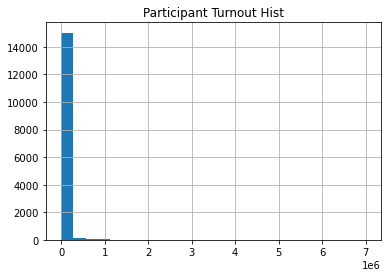

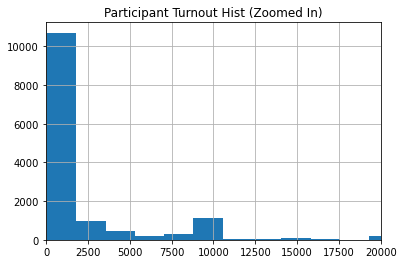

In [46]:
plt.figure()
df['participants_clean'].dropna().sort_values().hist(bins=25);
plt.title('Participant Turnout Hist')


plt.figure()
df['participants_clean'].dropna().sort_values().hist(bins=4000)
plt.xlim([0, 20000])
plt.title('Participant Turnout Hist (Zoomed In)');

# Move to Protester Identities and Demands

#### Protester Identity

In [47]:
# Replace unknowns with unknown for consistency
print(df.protesteridentity.value_counts().head(50))

df.protesteridentity.replace('unspecified', UNKNOWN, inplace=True)
df.protesteridentity.replace('people', UNKNOWN, inplace=True)
df['protesteridentity'] = df['protesteridentity'].fillna(UNKNOWN)

protesters                                                                               1541
students                                                                                  646
workers                                                                                   273
unspecified                                                                               224
farmers                                                                                   219
residents                                                                                 171
opposition supporters                                                                     165
university students                                                                       144
demonstrators                                                                             137
opposition                                                                                133
women                                                       

# Protester Demands

In [48]:
# Columns to be used for this section
demand_cols = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']

for col in demand_cols:    
    # Print list of demands in each relevant column
    print(df[col].value_counts())
    print('-----')

political behavior, process    9680
labor wage dispute             1710
price increases, tax policy    1087
removal of politician          1011
police brutality                825
land farm issue                 467
social restrictions             458
Name: protesterdemand1, dtype: int64
-----
political behavior, process    1004
removal of politician           768
labor wage dispute              438
police brutality                241
price increases, tax policy     214
social restrictions             212
land farm issue                 100
Name: protesterdemand2, dtype: int64
-----
price increases, tax policy    111
removal of politician           94
political behavior, process     63
labor wage dispute              61
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64
-----
.                              744
removal of politician           18
police brutality                 7
political behavio

In [49]:
# Create list of unique demands
demands = np.concatenate([df.protesterdemand1.dropna().unique(), 
                          df.protesterdemand2.dropna().unique(),
                          df.protesterdemand3.dropna().unique(), 
                          df.protesterdemand4.dropna().unique()])
# Verify there are only 7 demands as indicated by data manual
set(demands)

{'.',
 'labor wage dispute',
 'land farm issue',
 'police brutality',
 'political behavior, process',
 'price increases, tax policy',
 'removal of politician',
 'social restrictions'}

In [50]:
# Replace '.' with np.nan
for demand_col in demand_cols:
    df[demand_col].replace('.', np.nan, inplace=True)

In [51]:
# --- ONE HOT ENCODE EACH OF THESE DEMANDS
ohe = OneHotEncoder(sparse=False)


for demand_col in demand_cols:
    if demand_col == demand_cols[0]: #first iteration
        fit = ohe.fit_transform(df[demand_col].values.reshape(-1, 1))
        demand_array = np.array(fit)     
        print('Protester demand count:', np.sum(demand_array))
    else:
        fit = ohe.transform(df[demand_col].values.reshape(-1, 1))
        demand_array = np.logical_or(demand_array, fit)
        print('Protester demand count:', np.sum(demand_array))
        


# Clean column names
remove_commas = lambda x: str.replace(x, ', ', '/')
remove_spaces = lambda x: str.replace(x, ' ', '-')
col_names = ohe.get_feature_names(['demand'])
col_names = list(map(remove_spaces, map(remove_commas, col_names)))

# Store as dataframe 
demand_df = pd.DataFrame(demand_array, dtype='int', columns=col_names)
demand_df.drop('demand_nan', axis=1, inplace=True)

print('\nFinal shape:', demand_df.shape)
print('\nColumn names:', demand_df.columns)
print('\nRequests by type:\n{}'.format((demand_df.sum().sort_values(ascending=False))))

Protester demand count: 15239.0
Protester demand count: 30476
Protester demand count: 33453
Protester demand count: 33835

Final shape: (15239, 7)

Column names: Index(['demand_labor-wage-dispute', 'demand_land-farm-issue',
       'demand_police-brutality', 'demand_political-behavior/process',
       'demand_price-increases/tax-policy', 'demand_removal-of-politician',
       'demand_social-restrictions'],
      dtype='object')

Requests by type:
demand_political-behavior/process    10750
demand_labor-wage-dispute             2211
demand_removal-of-politician          1889
demand_price-increases/tax-policy     1414
demand_police-brutality               1101
demand_social-restrictions             684
demand_land-farm-issue                 582
dtype: int64


# State responses

In [52]:
# column names containing state response data
response_cols = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 
             'stateresponse5', 'stateresponse6', 'stateresponse7']

# Replace '.' with np.nan
for col in response_cols:
    df[col].replace('.', np.nan, inplace=True)

In [53]:
# Verify there are only 7 responses as indicated by data manual
# Create list of unique demands

demands = np.array([])
for col in response_cols:
    demands = np.concatenate([demands, df[col]])
print(set(demands))
# We see that there are 7 demands, plus placeholder '.' and 'nan' values to drop later

{nan, 'ignore', 'crowd dispersal', 'arrests', 'beatings', 'killings', 'accomodation', 'shootings'}


In [54]:
# --- ONE HOT ENCODE EACH OF THESE RESPONSES

ohe = OneHotEncoder(sparse=False)

for col in response_cols:
    if col == response_cols[0]: # first iteration
        fit = ohe.fit_transform(df[col].values.reshape(-1, 1))
        response_array = np.array(fit)     
        print('State response count:', np.sum(response_array))
        print('\nColumn_names:', ohe.get_feature_names(['response']))
    else:
        fit = ohe.transform(df[col].values.reshape(-1, 1))
        response_array = np.logical_or(response_array, fit)
        print('State response count:', np.sum(response_array))
        
print('\nPre-cleaning column names:', ohe.get_feature_names(['response']))
        
        
# # Clean column names
remove_spaces = lambda x: str.replace(x, ' ', '-')
col_names = ohe.get_feature_names(['response'])
col_names = list(map(remove_spaces, col_names))
print('\nPost-cleaning column names:', col_names)

# Store as dataframe 
response_df = pd.DataFrame(response_array, dtype='int', columns=col_names)
response_df.drop('response_nan', axis=1, inplace=True)

print('\nFinal shape:', response_df.shape)
print('\nColumn names:', response_df.columns)

State response count: 15239.0

Column_names: ['response_accomodation' 'response_arrests' 'response_beatings'
 'response_crowd dispersal' 'response_ignore' 'response_killings'
 'response_shootings' 'response_nan']
State response count: 30448
State response count: 33321
State response count: 34236
State response count: 34470
State response count: 34517
State response count: 34534

Pre-cleaning column names: ['response_accomodation' 'response_arrests' 'response_beatings'
 'response_crowd dispersal' 'response_ignore' 'response_killings'
 'response_shootings' 'response_nan']

Post-cleaning column names: ['response_accomodation', 'response_arrests', 'response_beatings', 'response_crowd-dispersal', 'response_ignore', 'response_killings', 'response_shootings', 'response_nan']

Final shape: (15239, 7)

Column names: Index(['response_accomodation', 'response_arrests', 'response_beatings',
       'response_crowd-dispersal', 'response_ignore', 'response_killings',
       'response_shootings'],
   

#### Identify next column to investigate:

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  15239 non-null  int64         
 1   year                                15239 non-null  int64         
 2   region                              15239 non-null  object        
 3   protest                             15239 non-null  int64         
 4   protestnumber                       15239 non-null  int64         
 5   startday                            15239 non-null  float64       
 6   startmonth                          15239 non-null  float64       
 7   startyear                           15239 non-null  float64       
 8   endday                              15239 non-null  float64       
 9   endmonth                            15239 non-null  float64       
 10  endyear               

In [56]:
df.loc[23]

id                                                                            202005001
year                                                                               2005
region                                                                    North America
protest                                                                               1
protestnumber                                                                         1
startday                                                                            3.0
startmonth                                                                          3.0
startyear                                                                        2005.0
endday                                                                              3.0
endmonth                                                                            4.0
endyear                                                                          2005.0
protesterviolence               

### Investigate "sources" and "notes" columns

In [57]:
df.sources.value_counts()

germany s car capital reels as court allows ban on cars the new york times, february 28, 2018 wednesday, section a; column 0; foreign desk; pg. 1, 1583 words, by katrin bennhold ;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [58]:
df.notes.value_counts()

general strike                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

##### As can be seen above, the 'source' and 'notes' columns don't contain standardized text. It is best to fill na's such that rows aren't dropped just because these columns aren't filled in

In [59]:
df['notes'] = df['notes'].fillna(UNKNOWN)
df['sources'] = df['sources'].fillna(UNKNOWN)

# Put it all together

In [60]:
# Take a look at everything that is an option
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  15239 non-null  int64         
 1   year                                15239 non-null  int64         
 2   region                              15239 non-null  object        
 3   protest                             15239 non-null  int64         
 4   protestnumber                       15239 non-null  int64         
 5   startday                            15239 non-null  float64       
 6   startmonth                          15239 non-null  float64       
 7   startyear                           15239 non-null  float64       
 8   endday                              15239 non-null  float64       
 9   endmonth                            15239 non-null  float64       
 10  endyear               

In [61]:
df.loc[df['year'] != df['startyear']]

,id,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,scode_final,countryname_final,start_datetime,end_datetime,duration_days,participants_clean,participants_category_manufactured


In [62]:
include_cols = ['id', 'countryname_final', 'scode_final', 'region', 'protestnumber', 'protesterviolence', 'protesteridentity',
                'startyear', 'startmonth', 'startday', 'duration_days',
                'participants_clean', 'participants_category', 'participants_category_manufactured', 'notes']

df[include_cols]

,id,countryname_final,scode_final,region,protestnumber,protesterviolence,protesteridentity,startyear,startmonth,startday,duration_days,participants_clean,participants_category,participants_category_manufactured,notes
0,201990001,Canada,CAN,North America,1,0.0,unknown,1990.0,1.0,15.0,0,1000.0,NaN,1000-1999,canada s railway passenger system was finally ...
1,201990002,Canada,CAN,North America,2,0.0,unknown,1990.0,6.0,25.0,0,1000.0,NaN,1000-1999,protestors were only identified as young peopl...
2,201990003,Canada,CAN,North America,3,0.0,separatist parti quebecois,1990.0,7.0,1.0,0,500.0,NaN,100-999,"the queen, after calling on canadians to remai..."
3,201990004,Canada,CAN,North America,4,1.0,mohawk indians,1990.0,7.0,12.0,56,100.0,NaN,100-999,canada s federal government has agreed to acqu...
4,201990005,Canada,CAN,North America,5,1.0,local residents,1990.0,8.0,14.0,1,950.0,NaN,100-999,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15234,9102014001,Papua New Guinea,PNG,Oceania,1,1.0,asylum seekers,2014.0,2.0,16.0,2,100.0,100-999,100-999,? a government inquiry will be launched as ser...
15235,9102016001,Papua New Guinea,PNG,Oceania,1,1.0,university students,2016.0,5.0,15.0,25,1000.0,1000-1999,1000-1999,police in papua new guinea fired gunshots wedn...
15236,9102017001,Papua New Guinea,PNG,Oceania,1,0.0,protesters opposed to renewing the licence of ...,2017.0,6.0,15.0,0,50.0,50-99,50-99,the bougainville government has enacted an ind...
15237,9102017002,Papua New Guinea,PNG,Oceania,2,1.0,protesters opposed to counting irregularities ...,2017.0,7.0,15.0,0,50.0,50-99,50-99,peter o neill has been reappointed as prime mi...


### Combine clean dataframe with protester demands and government responses

In [63]:
df_clean = pd.concat([df[include_cols], demand_df, response_df], axis=1)

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  15239 non-null  int64  
 1   countryname_final                   15239 non-null  object 
 2   scode_final                         15239 non-null  object 
 3   region                              15239 non-null  object 
 4   protestnumber                       15239 non-null  int64  
 5   protesterviolence                   15239 non-null  float64
 6   protesteridentity                   15239 non-null  object 
 7   startyear                           15239 non-null  float64
 8   startmonth                          15239 non-null  float64
 9   startday                            15239 non-null  float64
 10  duration_days                       15239 non-null  int64  
 11  participants_clean                  15208

### Fill na values where valuable, drop rows with remaining nas

In [65]:
df_clean['participants_category'] = df_clean['participants_category'].fillna(UNKNOWN)

##### Below, we see that there are 31 rows with null values. In all cases, it is in the 'participants' category. It is worth dropping these rows entirely since the participant count at a protest is an invaluable field in this analysis. 

In [66]:
df_clean.loc[df_clean.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 21 to 15100
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  31 non-null     int64  
 1   countryname_final                   31 non-null     object 
 2   scode_final                         31 non-null     object 
 3   region                              31 non-null     object 
 4   protestnumber                       31 non-null     int64  
 5   protesterviolence                   31 non-null     float64
 6   protesteridentity                   31 non-null     object 
 7   startyear                           31 non-null     float64
 8   startmonth                          31 non-null     float64
 9   startday                            31 non-null     float64
 10  duration_days                       31 non-null     int64  
 11  participants_clean                  0 non-n

In [67]:
# DROP ROWS WITH MISSING VALUES
df_clean.dropna(inplace=True)

In [68]:
# Verify that the desired columns are included

clean_cols = list(df_clean.columns)

for x_val in list(df.columns):
    incl = 'include:' if x_val in clean_cols else '*EXCLUDE*:'
    print(incl, x_val)

include: id
*EXCLUDE*: year
include: region
*EXCLUDE*: protest
include: protestnumber
include: startday
include: startmonth
include: startyear
*EXCLUDE*: endday
*EXCLUDE*: endmonth
*EXCLUDE*: endyear
include: protesterviolence
*EXCLUDE*: location
include: participants_category
*EXCLUDE*: participants
include: protesteridentity
*EXCLUDE*: protesterdemand1
*EXCLUDE*: protesterdemand2
*EXCLUDE*: protesterdemand3
*EXCLUDE*: protesterdemand4
*EXCLUDE*: stateresponse1
*EXCLUDE*: stateresponse2
*EXCLUDE*: stateresponse3
*EXCLUDE*: stateresponse4
*EXCLUDE*: stateresponse5
*EXCLUDE*: stateresponse6
*EXCLUDE*: stateresponse7
*EXCLUDE*: sources
include: notes
include: scode_final
include: countryname_final
*EXCLUDE*: start_datetime
*EXCLUDE*: end_datetime
include: duration_days
include: participants_clean
include: participants_category_manufactured


### Final, nit-picky cleanup

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15208 entries, 0 to 15238
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  15208 non-null  int64  
 1   countryname_final                   15208 non-null  object 
 2   scode_final                         15208 non-null  object 
 3   region                              15208 non-null  object 
 4   protestnumber                       15208 non-null  int64  
 5   protesterviolence                   15208 non-null  float64
 6   protesteridentity                   15208 non-null  object 
 7   startyear                           15208 non-null  float64
 8   startmonth                          15208 non-null  float64
 9   startday                            15208 non-null  float64
 10  duration_days                       15208 non-null  int64  
 11  participants_clean                  15208

In [70]:
# Convert relevant columns from float to int
convert_to_int = ['protesterviolence', 'startyear', 'startmonth', 'startday', 'participants_clean']

for col in convert_to_int:
    df_clean[col] = df_clean[col].astype('int')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15208 entries, 0 to 15238
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  15208 non-null  int64 
 1   countryname_final                   15208 non-null  object
 2   scode_final                         15208 non-null  object
 3   region                              15208 non-null  object
 4   protestnumber                       15208 non-null  int64 
 5   protesterviolence                   15208 non-null  int32 
 6   protesteridentity                   15208 non-null  object
 7   startyear                           15208 non-null  int32 
 8   startmonth                          15208 non-null  int32 
 9   startday                            15208 non-null  int32 
 10  duration_days                       15208 non-null  int64 
 11  participants_clean                  15208 non-null  in

In [71]:
df_clean.rename(columns={'participants_clean': 'participants', 
                         'participants_category': 'participants_category_original',
                         'id': 'protest_id', 
                         'ccode_fina': 'ccode',
                         'countryname_final': 'country'}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15208 entries, 0 to 15238
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   protest_id                          15208 non-null  int64 
 1   country                             15208 non-null  object
 2   scode_final                         15208 non-null  object
 3   region                              15208 non-null  object
 4   protestnumber                       15208 non-null  int64 
 5   protesterviolence                   15208 non-null  int32 
 6   protesteridentity                   15208 non-null  object
 7   startyear                           15208 non-null  int32 
 8   startmonth                          15208 non-null  int32 
 9   startday                            15208 non-null  int32 
 10  duration_days                       15208 non-null  int64 
 11  participants                        15208 non-null  in

##### Final EDA of Response columns

In [73]:
df_response_OG = df[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7']].copy()

temp = pd.concat([response_df, df_response_OG], axis=1)
temp.loc[(temp.stateresponse1=='accomodation') & (temp.stateresponse2.isna())]

,response_accomodation,response_arrests,response_beatings,response_crowd-dispersal,response_ignore,response_killings,response_shootings,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
3,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
19,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
39,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
45,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
46,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
15230,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
15231,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
15232,1,0,0,0,0,0,0,accomodation,NaN,NaN,NaN,NaN,NaN,NaN


# Export as SQL

In [74]:
engine = create_engine('sqlite:///../data/processed/protests.db')

with engine.begin() as connection:
    df_clean.to_sql(name='protests', con=engine, if_exists='replace', index=False)

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15208 entries, 0 to 15238
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   protest_id                          15208 non-null  int64 
 1   country                             15208 non-null  object
 2   scode_final                         15208 non-null  object
 3   region                              15208 non-null  object
 4   protestnumber                       15208 non-null  int64 
 5   protesterviolence                   15208 non-null  int32 
 6   protesteridentity                   15208 non-null  object
 7   startyear                           15208 non-null  int32 
 8   startmonth                          15208 non-null  int32 
 9   startday                            15208 non-null  int32 
 10  duration_days                       15208 non-null  int64 
 11  participants                        15208 non-null  in